In [2]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
import io

In [3]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [4]:
def pyramid(n):
    for i in range(n):
        print(" "*(n-i)+"*"*(2*i+1))

In [5]:
def reverse_pyramid(n):
    for i in range(n,-1,-1):
        print(" "*(n-i)+"*"*(2*i+1))

In [6]:
pyramid(5) 
reverse_pyramid(5)

     *
    ***
   *****
  *******
 *********
***********
 *********
  *******
   *****
    ***
     *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [7]:
with open('symbols01.txt') as file:
    symbols01=file.read()
    symbols01=set(symbols01.strip().split("\n"))
  
with open('symbols02.txt') as file:
    symbols02=file.read()
    symbols02=set(symbols02.strip().split("\n"))
    
symbols03=list(symbols01 or symbols02)

In [8]:
symbols03

['CKPT',
 'PTF',
 'FTGC',
 'IVAC',
 'METC',
 'FUNC',
 'BRQS',
 'FAB',
 'ASNS',
 'PHIIK',
 'SRRA',
 'CTSO',
 'CNAT',
 'CGO',
 'HBIO',
 'XBIT',
 'TRCB',
 'CBAN',
 'ZYNE',
 'NWFL',
 'CNACU',
 'ADMP',
 'CPIX',
 'DWIN',
 'BANX',
 'IVTY',
 'QTRH',
 'ALSK',
 'IGLD',
 'MAMS',
 'ADES',
 'RFEU',
 'VRIG',
 'AGRX',
 'GRVY',
 'OCUL',
 'OVLY',
 'LIFE',
 'DAIO',
 'FATE',
 'MSBF',
 'LWAY',
 'RGCO',
 'AIRR',
 'REDU',
 'INSG',
 'ROBO',
 'DWFI',
 'TCBIP',
 'CYBE',
 'TRIB',
 'MGEN',
 'TESO',
 'FAD',
 'OFS',
 'III',
 'AMRS',
 'AKTS',
 'SBPH',
 'HYGS',
 'MCHX',
 'INSE',
 'GWRS',
 'OMED',
 'PROV',
 'PCYO',
 'NWPX',
 'COOL',
 'LMB',
 'SYBX',
 'CLUB',
 'EBMT',
 'LGCY',
 'NEPT',
 'PCMI',
 'PKBK',
 'CDOR',
 'LAND',
 'GLDI',
 'SBRAP',
 'ZKIN',
 'TRIL',
 'PNRG',
 'QUIK',
 'VTWV',
 'DTEA',
 'ESGD',
 'PHII',
 'USAP',
 'EML',
 'RIOT',
 'ZIV',
 'HMNY',
 'ACRX',
 'ALRN',
 'ZLAB',
 'AVXL',
 'MLVF',
 'DRNA',
 'FBIO',
 'ESCA',
 'LYTS',
 'GEC',
 'SBCP',
 'VOXX',
 'QQXT',
 'MACK',
 'ONVO',
 'PCOM',
 'TNTR',
 'SAL',
 'NHTC',

In [9]:
with open('symbols03.txt','w') as file:
    for symbol in symbols03:
        file.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [10]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding="big5"
file3 = r.text.split("\r\n")
file3 = io.StringIO(r.text)
data3 = pd.read_csv(file3, skiprows=1)

In [11]:
data3

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [12]:
df = data['AAPL']

In [13]:
#bbands策略,22ma=月均線
df['22ma'] = pd.Series.rolling(df['Close'], window=22).mean()
df['sd'] = pd.Series.rolling(df['Close'], window=22).std()

In [154]:
# bbands上限+2sd ,bbands下限-2sd
#股價線=收盤價

df['upbbands'] = df['22ma']+2*df['sd']
df['lowbbands'] = df['22ma']-2*df['sd']
df['stockprice']=df['Close']

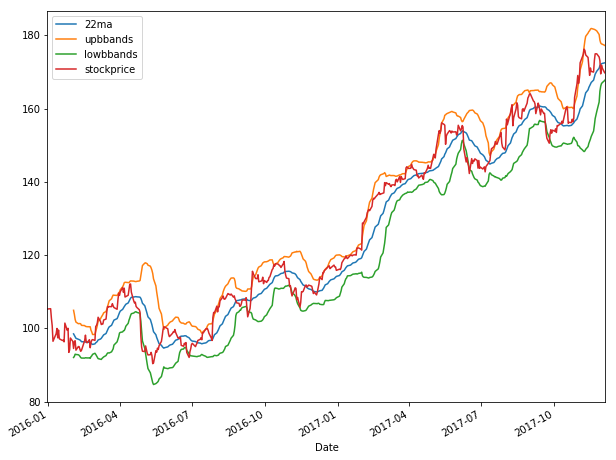

In [155]:
df['22ma'].plot(legend='best', figsize=(10,8))
df['upbbands'].plot(legend='best', figsize=(10,8))
df['lowbbands'].plot(legend='best', figsize=(10,8))
df['stockprice'].plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [15]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [16]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [17]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [18]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [19]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [20]:
def M064810001_strategy(df):
    has_position = False
    df['signals'] = 0
    
    #10日乖離率達到-4.5%以下+收盤跌破bband下限(買進)
    #10日乖離率+5.0%以上+收盤漲破bbands上限(賣出)
    
    df['upbbands'], df['22ma'],df['lowbbands'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)
    df['10ma'] = pd.Series.rolling(df['Close'], window=10).mean()
    df['bias']= (df['Close']-df['10ma'])/df['10ma']
    for t in range(2, df['signals'].size):
        if df['bias'][t] < -0.045 and ( df['Close'][t] < df['lowbbands'][t-1]) :
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['bias'][t] > 0.05 and ( df['Close'][t] > df['upbbands'][t-1] ):
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
    df['positions'] = df['signals'].cumsum().shift()
    return df
def apply_strategy(strategy, df):
    return strategy(df)

In [21]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy,M064810001_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

Symbol: CSML 使用 M064810001_strategy 策略沒有出現買賣訊號。
Symbol: LCA 使用 M064810001_strategy 策略沒有出現買賣訊號。
Symbol: PSC 使用 M064810001_strategy 策略沒有出現買賣訊號。


In [22]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [23]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.653258,-0.296449,244,1.193656,705,6,TICC,M064810001_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [24]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
72,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
73,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
65,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [25]:
results_df.sort_values('returns',ascending=False)

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
77,3.581888,-0.280611,202,3.429768,705,15,BBGI,M064810001_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
76,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
15,1.838879,-0.255472,85,2.006264,705,8,CDZI,M064810001_strategy
27,5.706610,-0.049168,12,1.965068,705,4,RICK,M064810001_strategy
54,1.360187,-0.250879,130,1.816706,705,15,GERN,M064810001_strategy
88,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy
57,1.603227,-0.262472,162,1.704982,705,21,CDXS,BBands_strategy
